In [1]:
import suite2p
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import os
import glob
##python -m pip install -U scikit-image
from skimage import measure
from natsort import natsorted
from multiprocessing import Pool
import importlib
import sys
# Add the directory containing your script to the Python path
#sys.path.append('C:\\Users\\User\\Project-SLMonlineControl\PYsubfun')
sys.path.append('C:\\Users\\User\\Project-SLMonlineControl\PYsubfun')
# Now you can import your script as a module
import CalBin2p as CB
# Now you can import your script as a module
import FastBin_Suite2p as FBS

import gc
gc.collect()

3711

In [2]:
importlib.reload(FBS)
# Pre-set parameters, and load the only bin files in the pre-set path folde
ConfigFolder=r'C:\Users\User\Project-SLMonlineControl\config'
ops0=FBS.configLoad(ConfigFolder,'SLMsetting.yml','ops3Planes.npy')
#ops0['save_path0']=r'F:\LuSLMOnlineTest\04112024'
nplanes=ops0['nplanes'];
binFile = glob.glob(ops0['save_path0'] + '/*Point*.bin')
#print(binFile)
#del statSingleP


In [3]:
print(ops0['save_path0'])

F:\LuSLMOnlineTest\SL0242-Ai203\08272024\


In [4]:
binFolder=ops0['save_path0']
#print(binFolder)
## creat new folder to process the data
SaveFolder=os.path.join(ops0['save_path0'], 'suite2p');
#print(SaveFolder)
#SLMxmlFolder=os.path.join(ops0['save_path0']+'SingleP', 'AllPoint');
SLMxmlFolder=os.path.join(ops0['save_path0']+'\SingleP','20PixelFromEdgeExc');
#SLMxmlFolder=os.path.join(ops0['save_path0'], 'SingleP');
#print(SLMxmlFolder)
CombinePath=os.path.join(SaveFolder, 'combined');
#print(CombinePath)
loaded_data=np.load(os.path.join(CombinePath, "statUpdate.npz"),allow_pickle=True)
stat=loaded_data['stat']
UnitPlane=loaded_data['UnitPlane']

loaded_data=np.load(os.path.join(CombinePath, "ops.npy"),allow_pickle=True)
#stat=np.load(os.path.join(CombinePath, "stat.npy"),allow_pickle=True)
iscell=np.load(os.path.join(CombinePath, "iscell.npy"))


In [5]:
print(SLMxmlFolder)

F:\LuSLMOnlineTest\SL0242-Ai203\08272024\\SingleP\20PixelFromEdgeExc


In [6]:
UnitPlane=np.array(UnitPlane)
#print(UnitPlane==0 && iscell[:,0]==1)
#statSingleP=stat[(UnitPlane==0)&(iscell[:,0]==1)]

stat=stat[iscell[:,0]==1]
UnitPlane=UnitPlane[iscell[:,0]==1]
iscell=iscell[iscell[:,0]==1,:]

temp_mat_data = scipy.io.loadmat(os.path.join(SLMxmlFolder,"SLMIncludedIndFromIscell.mat"))


SinglePInd=temp_mat_data['SLMIncludedIndFromIscell'].flatten()-1      ##Original Index is defined in MATLAB, should -1 for Python Index
#print(SinglePInd)

statSingleP=stat[SinglePInd]
PlaneSingleP=UnitPlane[SinglePInd]
SinglePID=SinglePInd+1
print(SinglePID)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [7]:
cellIDMap, CellPixCount, MedCenter=CB.Suite2pCellIDMap(ops0,stat,iscell)
#plt.imshow(cellIDMap)
#print(MedCenter)
#ZPlane = [0,60,120]
CellXYZ=np.vstack((MedCenter.T,UnitPlane))
#print(CellXYZ)
CellXYZ=CellXYZ.T
#print(CellXYZ)
CellXYZ=CellXYZ[:,[1,0,2]]
ZPlane=np.array([0,50,100])
##CellXYZ: 3D Coordinates of Cell Center
for iZ,Zdepth in enumerate(ZPlane):CellXYZ[UnitPlane==iZ, 2] = Zdepth

print(CellXYZ.shape)
#CellXYZ[SinglePInd[CellID],range(2)]

(31, 3)


In [8]:
len(PlaneSingleP)
colorCell=[None]
colorCell[0]=[0,1,0]
LineWidth=1
ResponseAll=[None]*len(PlaneSingleP)
print(np.ceil(len(statSingleP)/4))
np.int16(np.ceil(len(statSingleP)/4))
#print(PlaneSingleP)
#print(statSingleP)

8.0


8

In [9]:
importlib.reload(CB)
matching_files = []
matching_files.extend(glob.glob(os.path.join(SLMxmlFolder, 'Data/*Point*.bin' )))
#print(matching_files)

SingL=100
FilesOut=CB.PointLaser_files(matching_files)
#print(FilesOut)
PointBinLevel=np.int16(list(FilesOut.keys()))
print(PointBinLevel)
#FilesOut[m[2]].keys()
# Loop through the outer dictionary by Point numbers
FAll=dict()
DeltaFAll=dict()
SpksAll=dict()
# Loop through the outer dictionary by Point numbers
for point_number, lasers in FilesOut.items():
    #print(f"Point {point_number}:")
    CellI=np.int16(point_number)-1
    #print(CellI)
    FAll[point_number]=dict()
    DeltaFAll[point_number]=dict()
    SpksAll[point_number]=dict()
    # Loop through the nested dictionary by Laser levels for each Point
    for laser_level, files in lasers.items():
        #print(laser_level)
        print(f" Point {point_number}Laser {laser_level}:")
        
        plane_idx=PlaneSingleP[CellI]
        FAll[point_number][laser_level],DeltaFAll[point_number][laser_level],SpksAll[point_number][laser_level]=CB.NeuroFromBin(files,statSingleP,plane_idx,SingL,ops0)


[ 4 11 17 29 30  1 14 20 23 28 18]
 Point 4Laser 1.6:
Masks created, 0.49 sec.


c:\users\user\suite2p\suite2p\extraction\extract.py:125: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  Fi[n] = np.dot(data[:, cell_ipix[n]], cell_lam[n])


Extracted fluorescence from 31 ROIs in 100 frames, 4.96 sec.
Extracted fluorescence from 31 ROIs in 100 frames, 0.14 sec.
Masks created, 0.49 sec.
Extracted fluorescence from 31 ROIs in 100 frames, 0.10 sec.
Extracted fluorescence from 31 ROIs in 100 frames, 0.14 sec.
Masks created, 0.50 sec.
Extracted fluorescence from 31 ROIs in 100 frames, 0.09 sec.
Extracted fluorescence from 31 ROIs in 100 frames, 0.14 sec.
Masks created, 0.49 sec.
Extracted fluorescence from 31 ROIs in 100 frames, 0.09 sec.
Extracted fluorescence from 31 ROIs in 100 frames, 0.14 sec.
Masks created, 0.49 sec.
Extracted fluorescence from 31 ROIs in 100 frames, 0.10 sec.
Extracted fluorescence from 31 ROIs in 100 frames, 0.14 sec.
Masks created, 0.49 sec.
Extracted fluorescence from 31 ROIs in 100 frames, 0.10 sec.
Extracted fluorescence from 31 ROIs in 100 frames, 0.14 sec.
Masks created, 0.49 sec.
Extracted fluorescence from 31 ROIs in 100 frames, 0.10 sec.
Extracted fluorescence from 31 ROIs in 100 frames, 0.15 s

0
1


KeyError: '2'

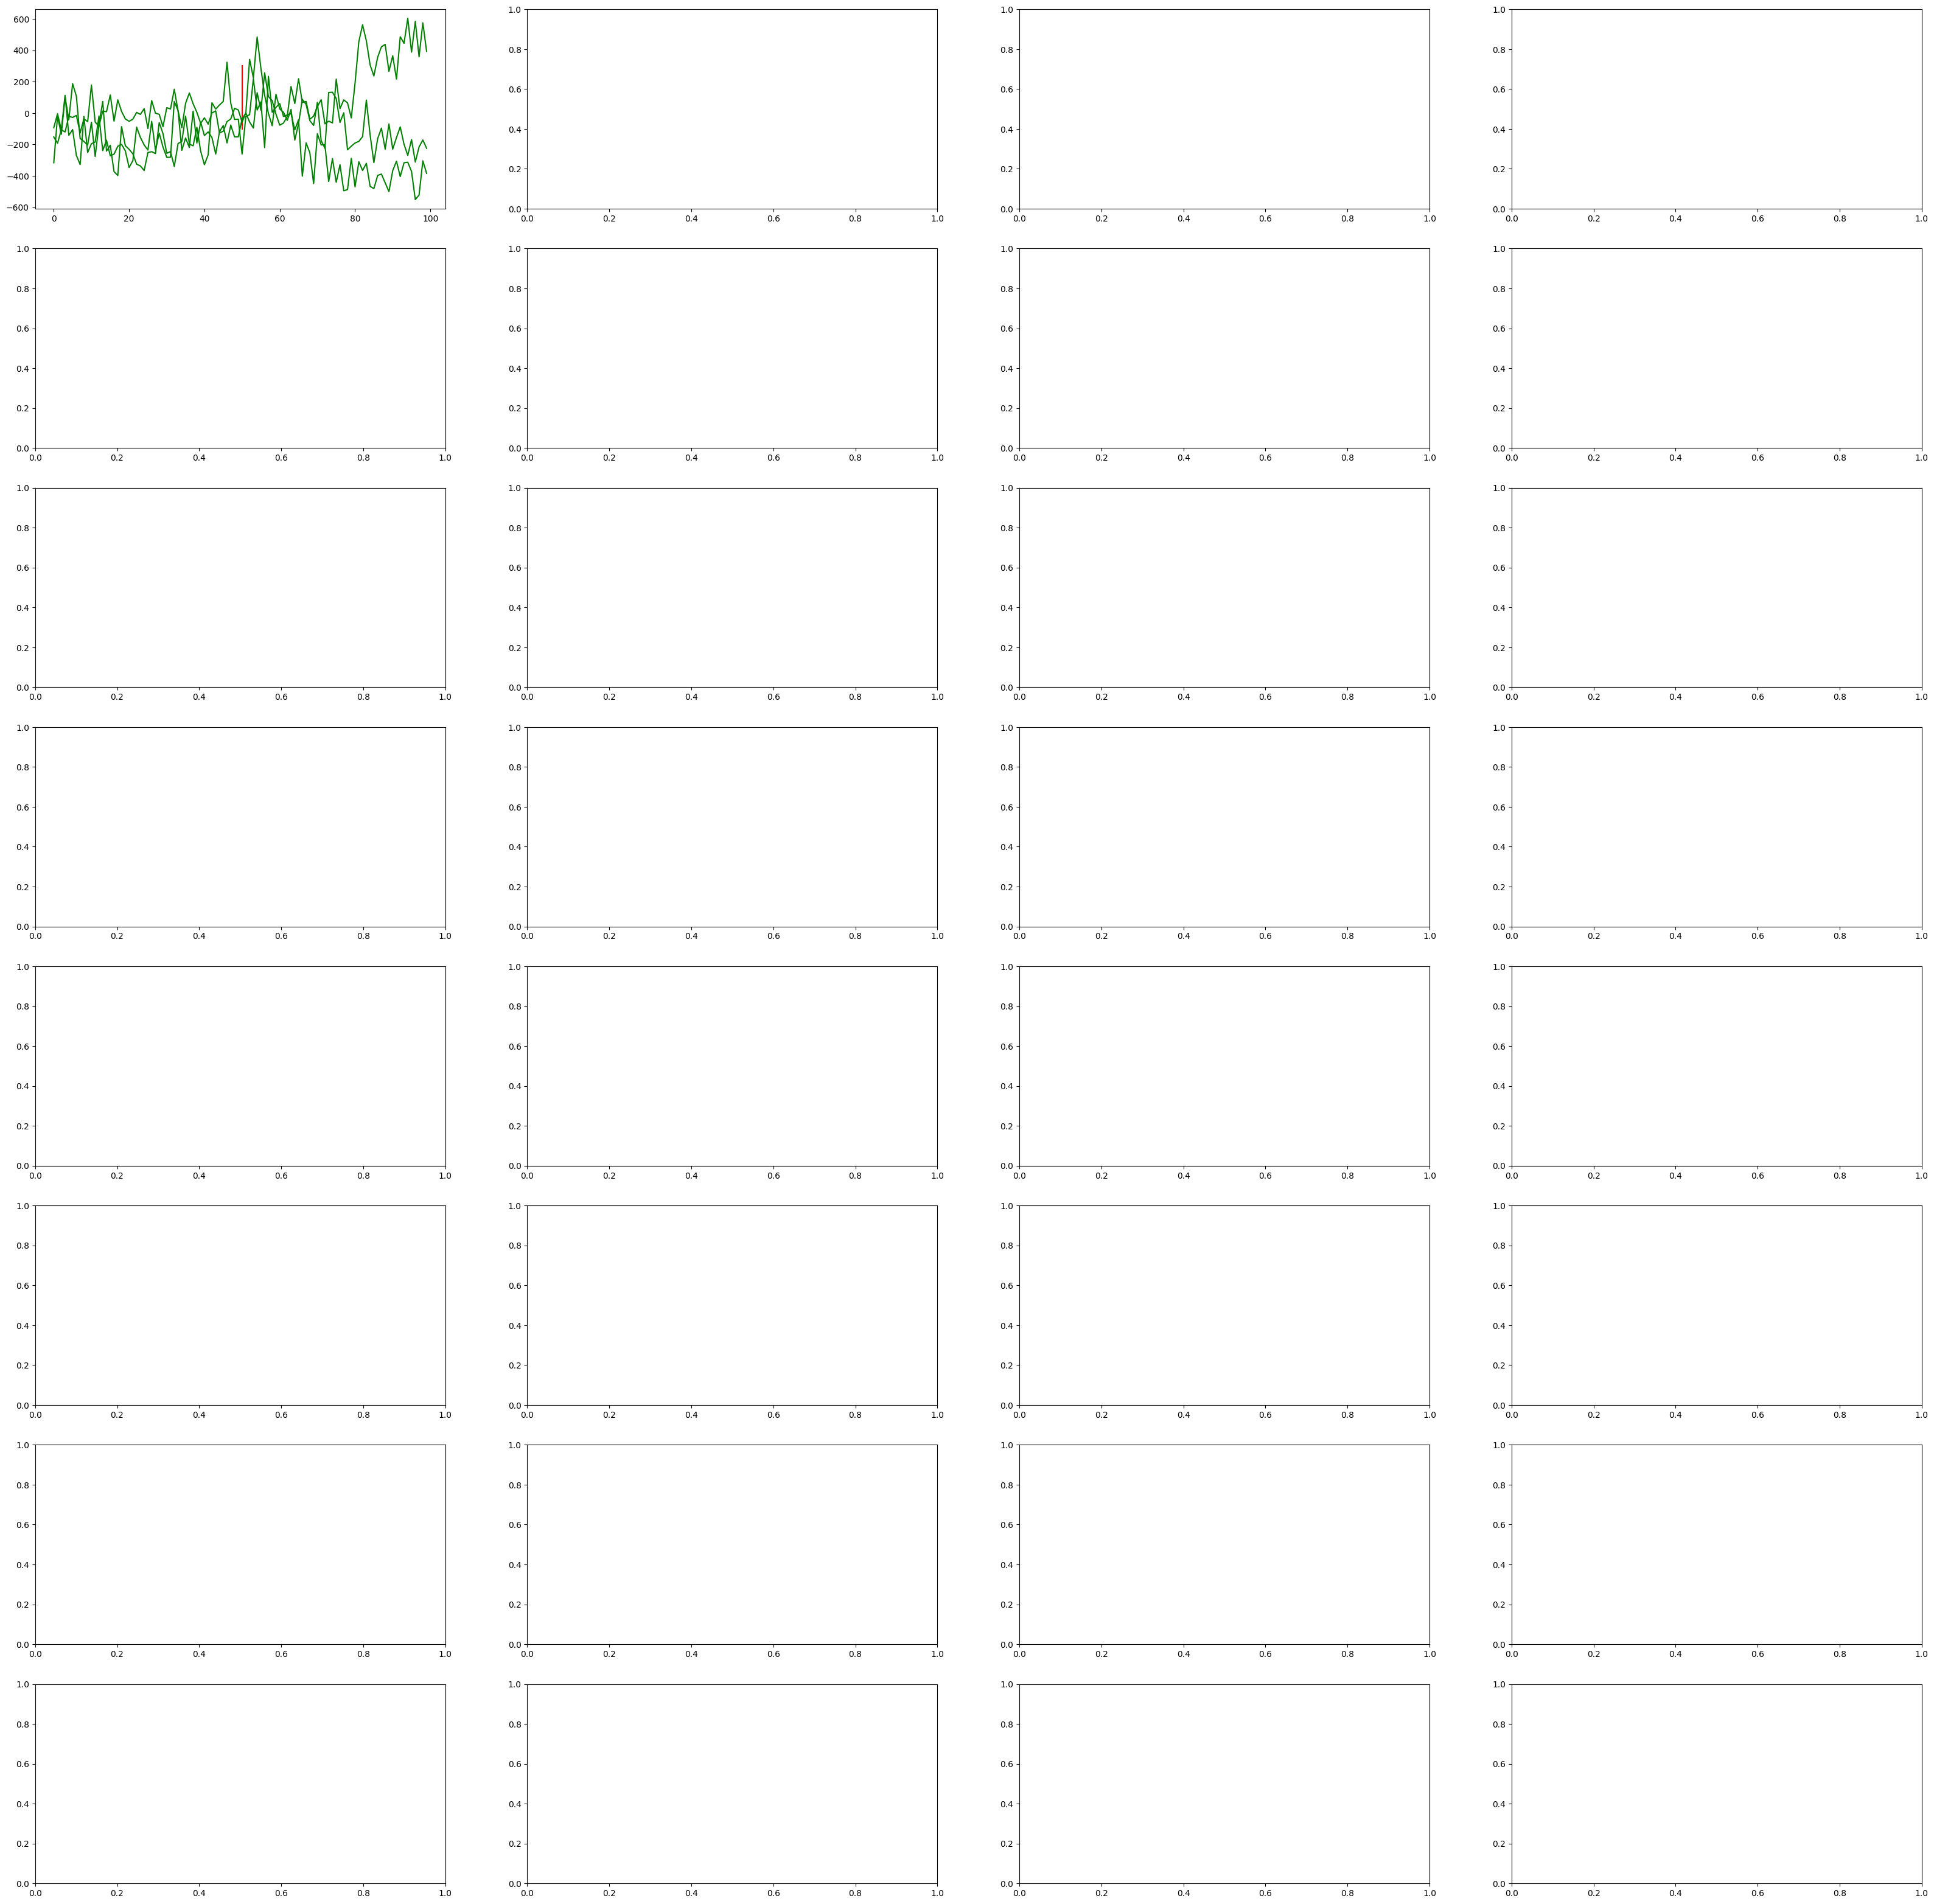

In [42]:
#print(np.ceil(len(statSingleP)/4)
preStim=range(40,60)
num_rows = np.ceil(len(statSingleP) / 4).astype(int)
SmoothParam=[0.5,0.5]
fig, ax = plt.subplots(num_rows,4,figsize=(40,40))
#ax=ax.flatten()
for CellI,axSub in enumerate(ax.flatten()):
    
    if CellI == len(statSingleP):
        break
    print(CellI)
    PSTH=FAll[str(CellI+1)]['1.6']
    PSTH=PSTH[CellI,:,:]
    baseLine=np.mean(PSTH[preStim,:],axis=0)
    baseLine=np.tile(baseLine.T,(SingL,1))
    baseLine.shape
    #print(baseLine.shape)
    Result=PSTH-baseLine
    axSub.plot([50,50],[-100,300],'r')
    axSub.plot(range(0,SingL),Result,'g')


0


KeyError: '1.5'

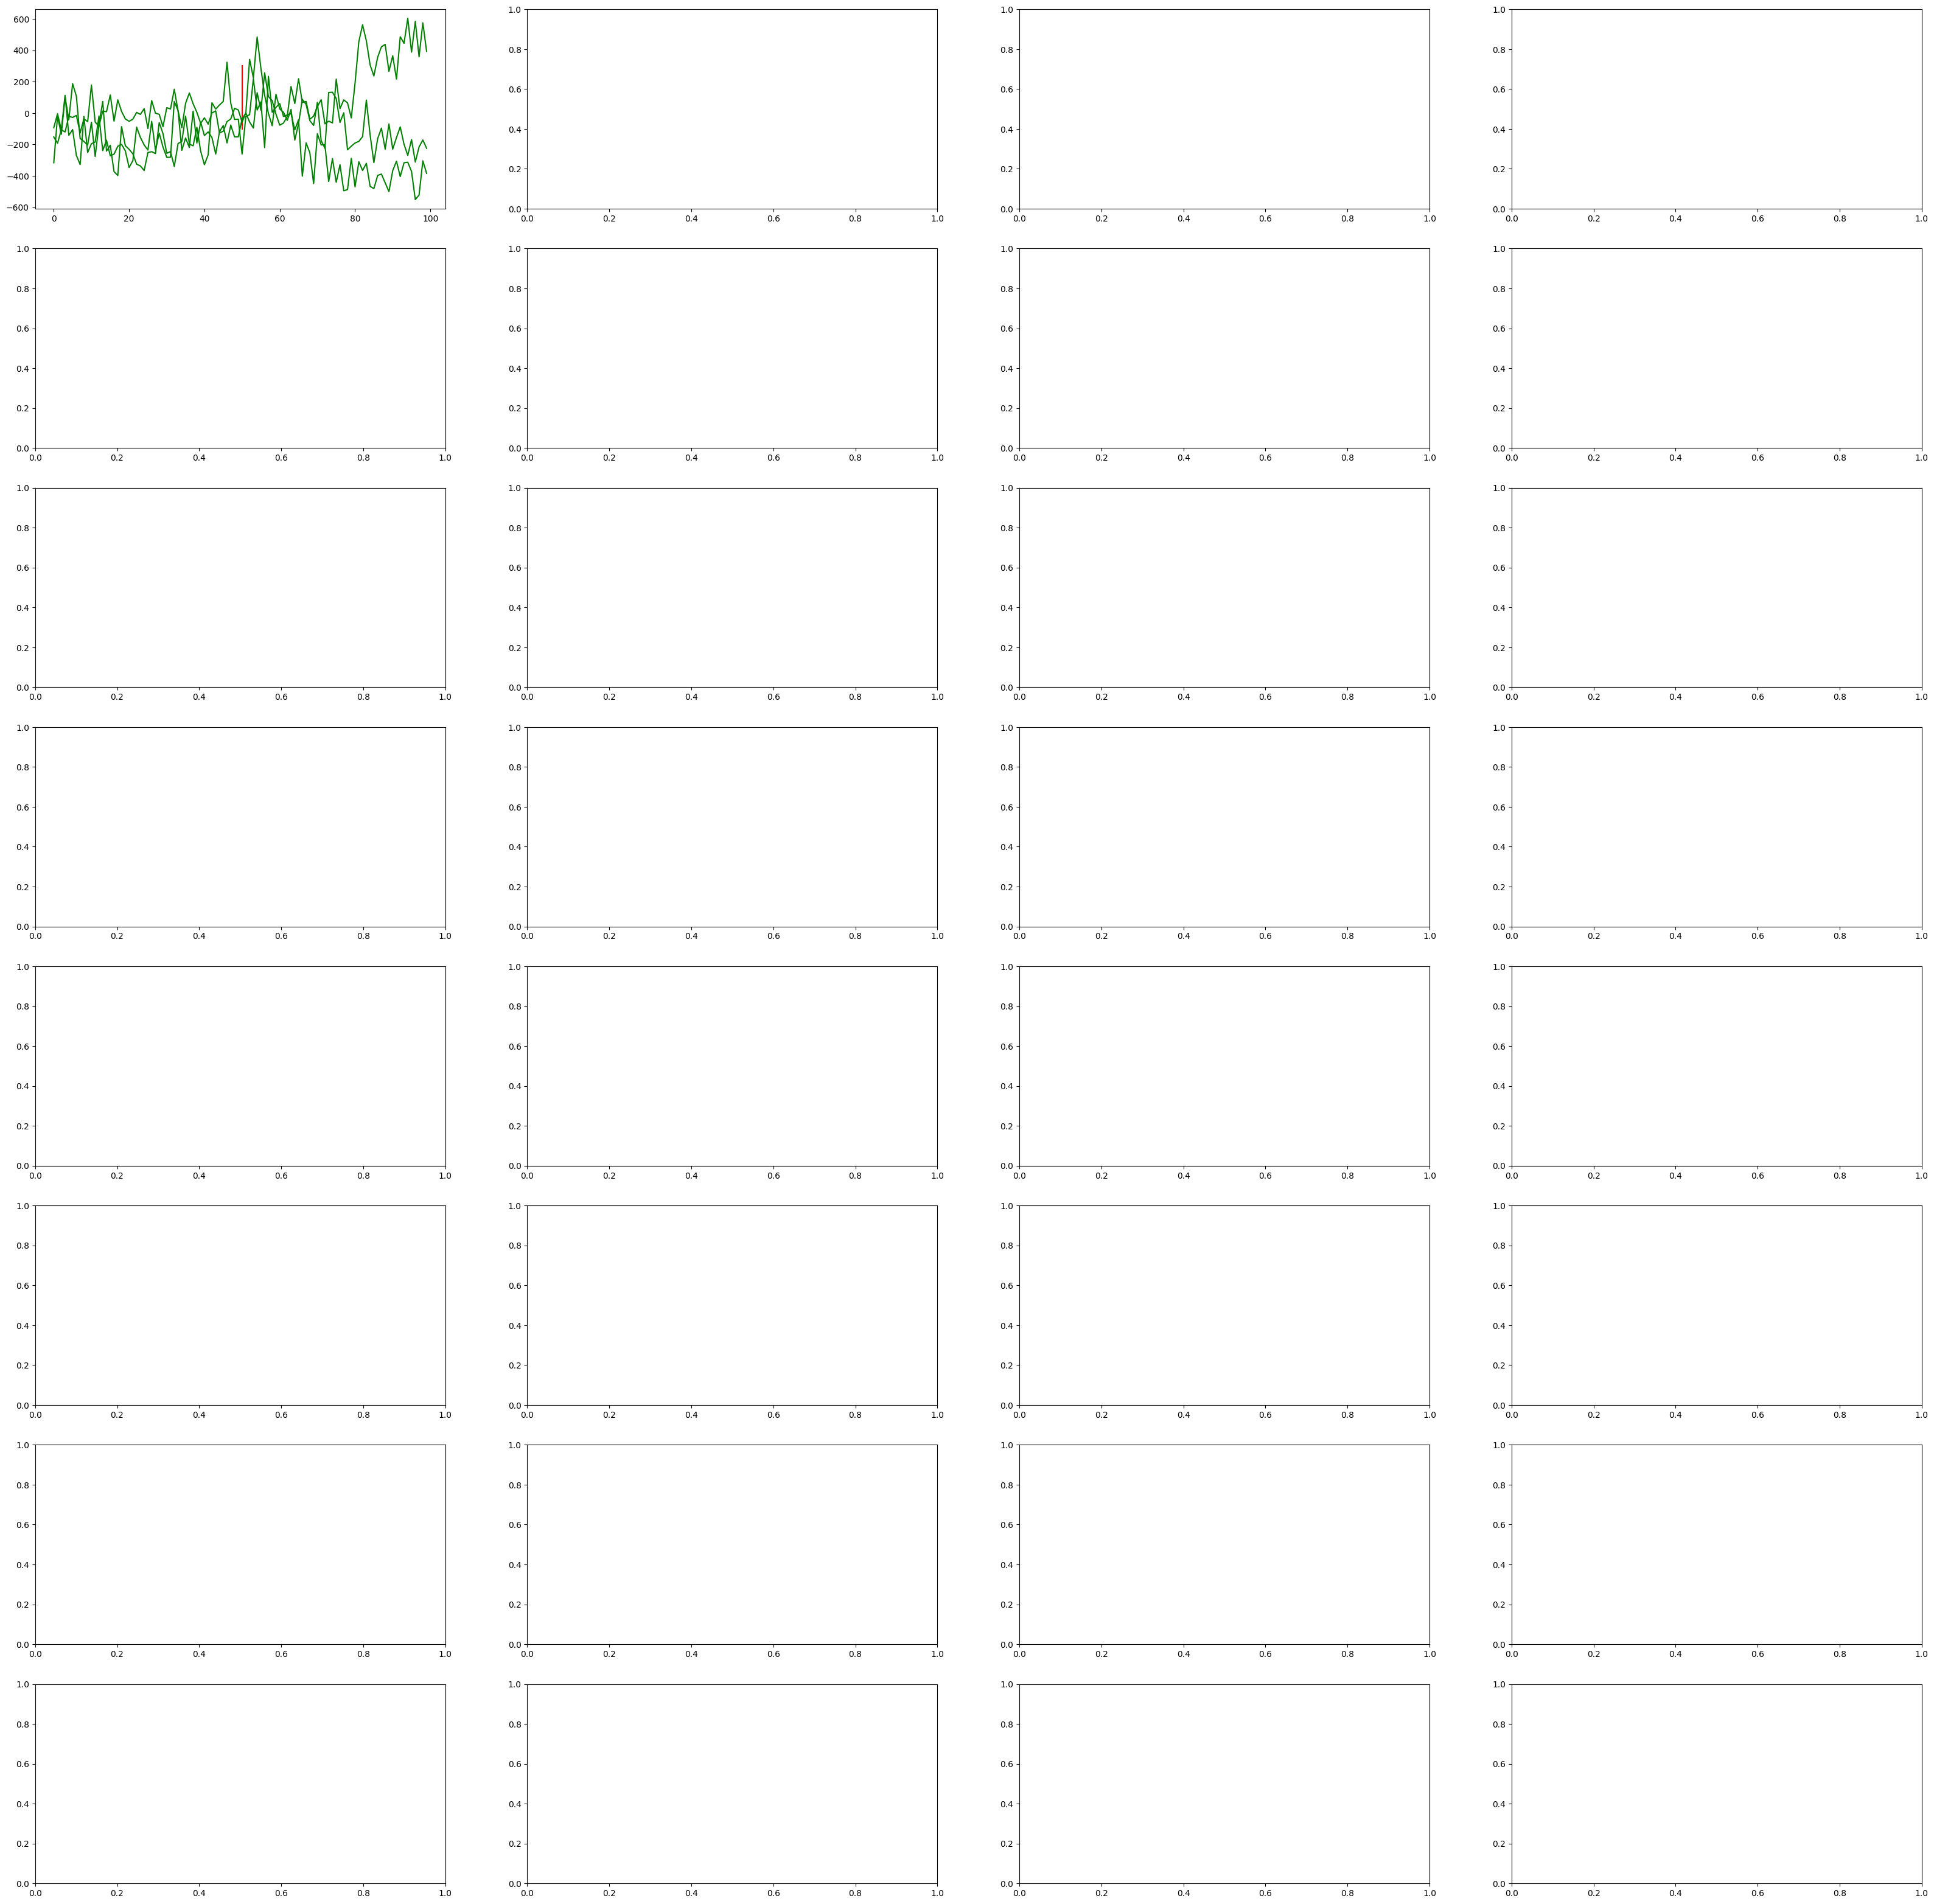

In [41]:
#print(np.ceil(len(statSingleP)/4)
preStim=range(40,60)
num_rows = np.ceil(len(statSingleP) / 4).astype(int)
SmoothParam=[0.5,0.5]
fig, ax = plt.subplots(num_rows,4,figsize=(40,40))
#ax=ax.flatten()
for CellI,axSub in enumerate(ax.flatten()):
    
    if CellI == len(statSingleP):
        break
    print(CellI)
    PSTH=FAll[str(CellI+1)]['1.6']
    PSTH=PSTH[CellI,:,:]
    baseLine=np.mean(PSTH[preStim,:],axis=0)
    baseLine=np.tile(baseLine.T,(SingL,1))
    baseLine.shape
    #print(baseLine.shape)
    Result=PSTH-baseLine
    axSub.plot([50,50],[-100,300],'r')
    axSub.plot(range(0,SingL),Result,'g')

    PSTH=FAll[str(CellI+1)]['1.5']
    PSTH=PSTH[CellI,:,:]
    baseLine=np.mean(PSTH[preStim,:],axis=0)
    baseLine=np.tile(baseLine.T,(SingL,1))
    baseLine.shape
    #print(baseLine.shape)
    Result=PSTH-baseLine
    axSub.plot(range(0,SingL),Result,'b')

In [43]:

PSTH=FAll[str(CellI+1)]['1.6']

KeyError: '2'

0
1
2
3
4
5
6
7
8
9


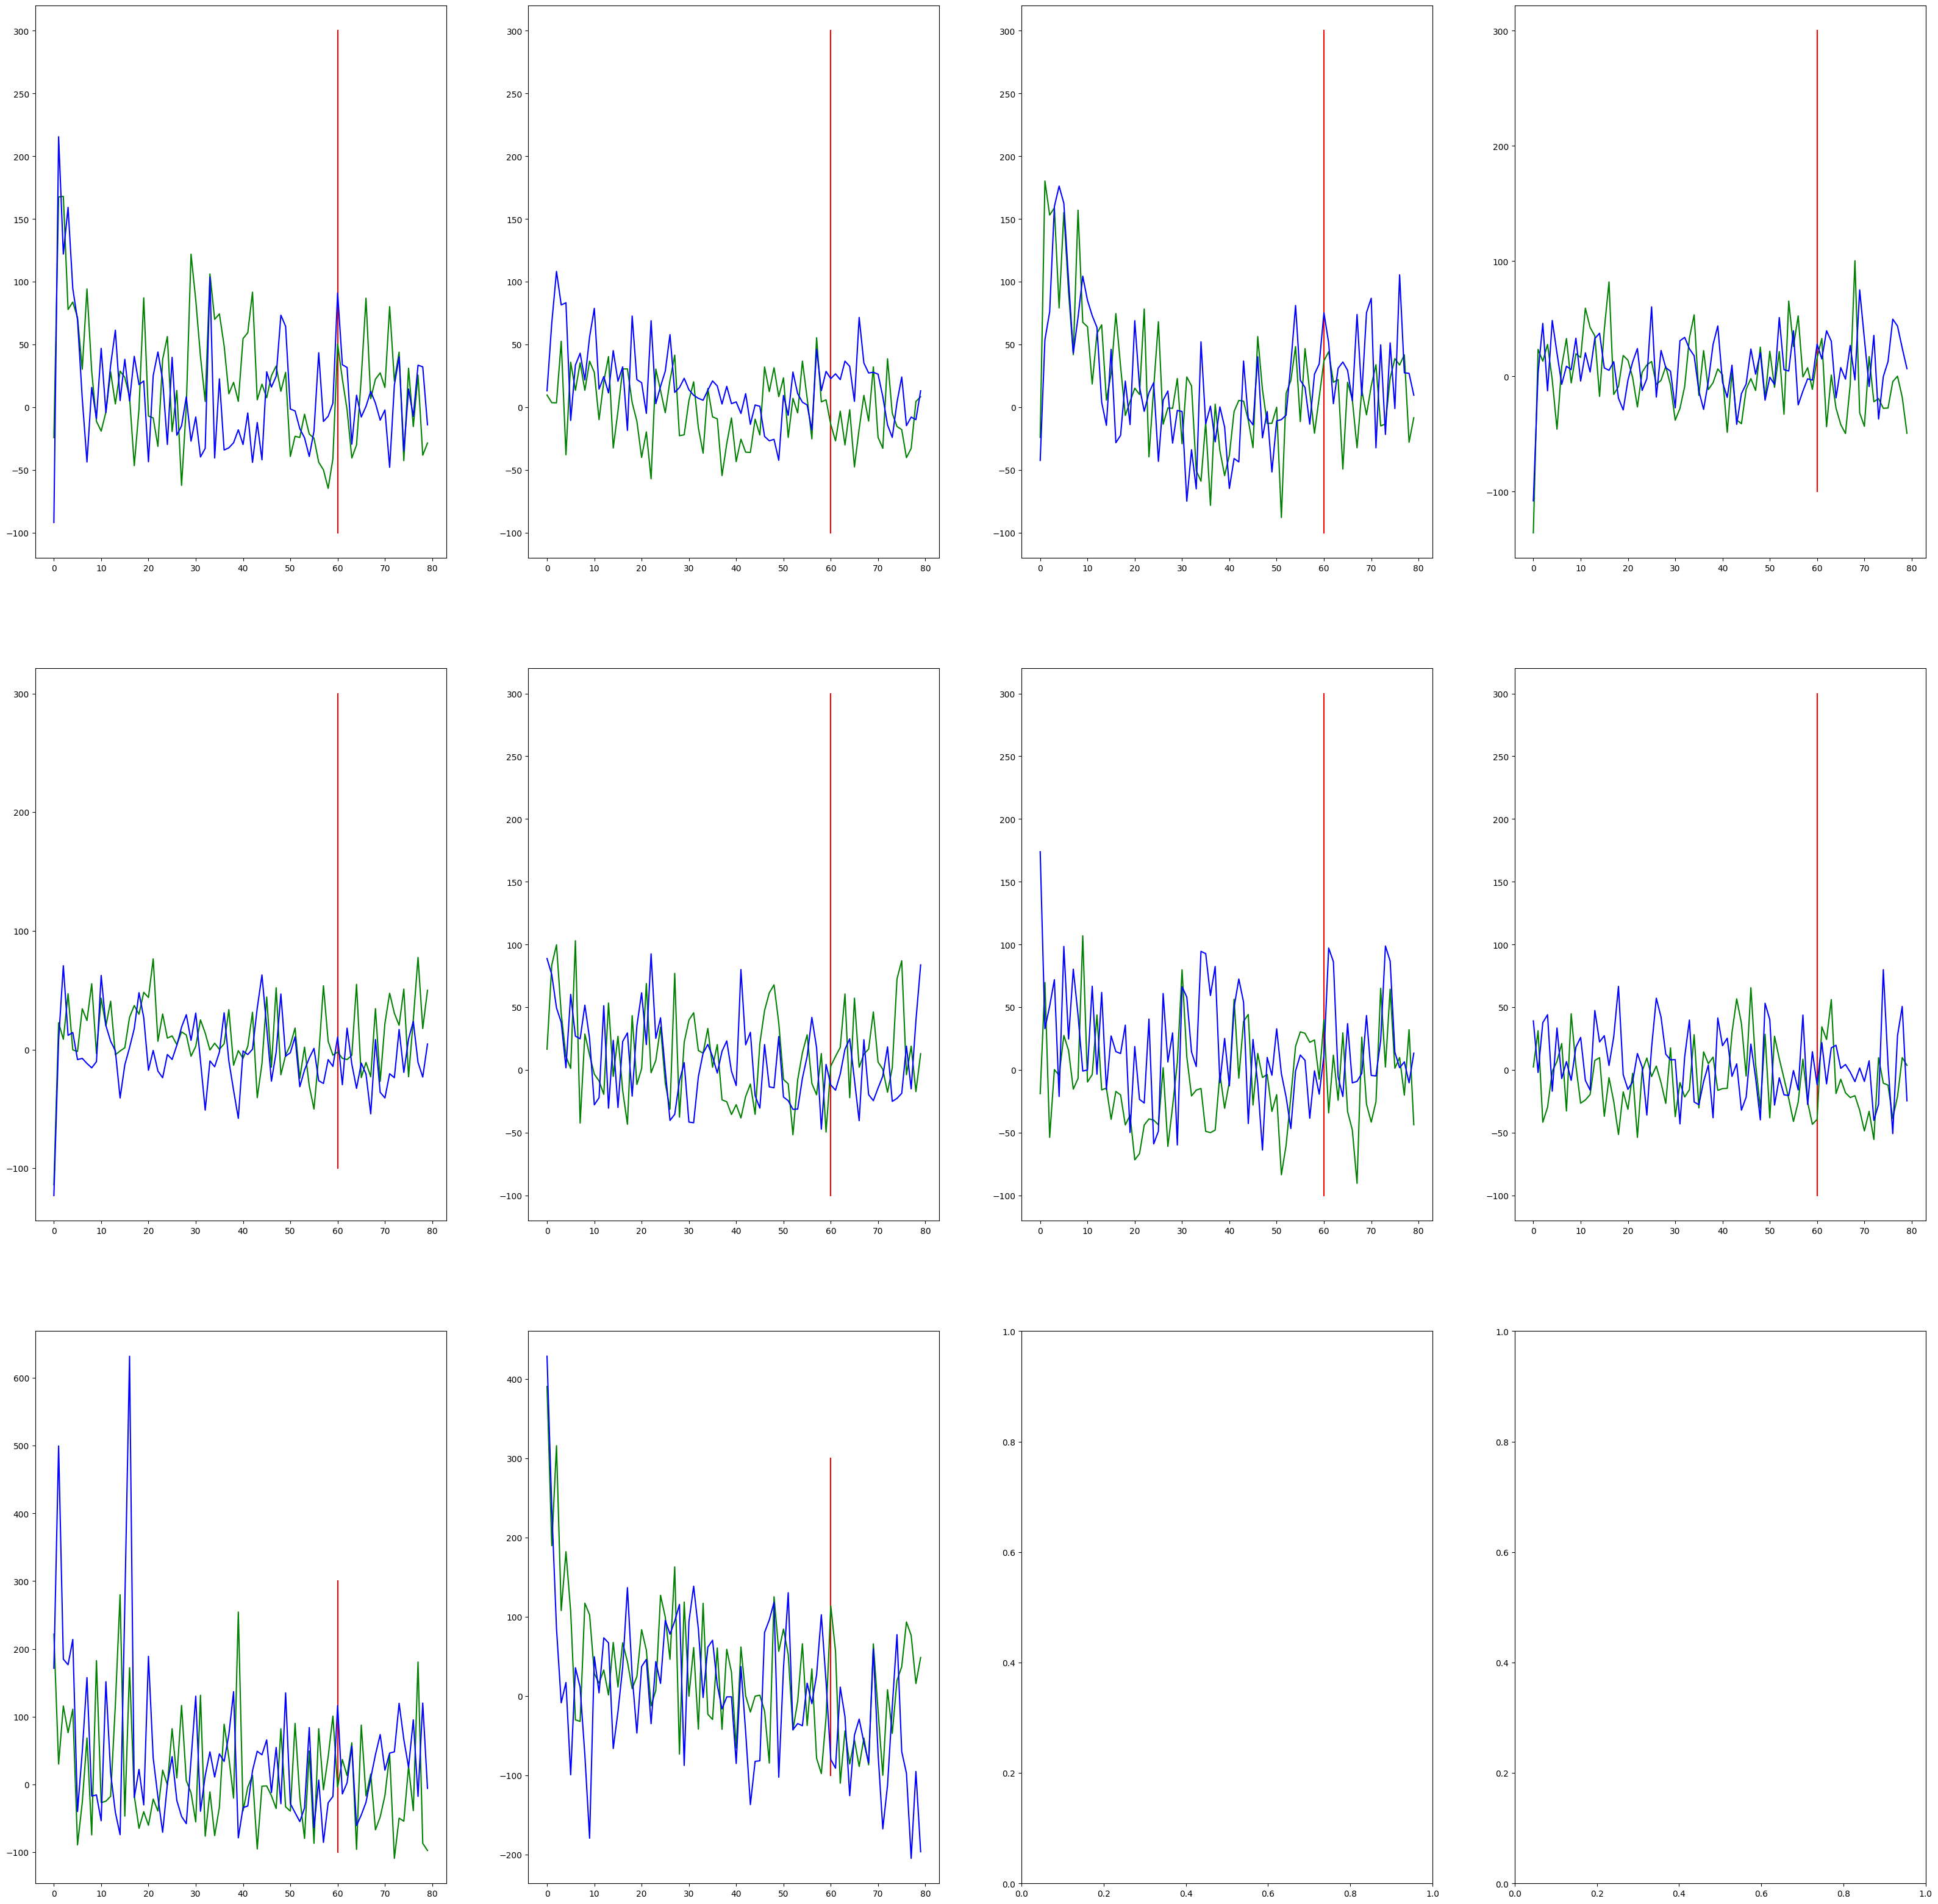

In [13]:
#print(np.ceil(len(statSingleP)/4)
preStim=range(40,60)
SingL=80
num_rows = np.ceil(len(statSingleP) / 4).astype(int)
SmoothParam=[0.5,0.5]
fig, ax = plt.subplots(num_rows,4,figsize=(40,40))
#ax=ax.flatten()
for CellI,axSub in enumerate(ax.flatten()):
    
    if CellI == len(statSingleP):
        break
    print(CellI)
    PSTH=FAll[str(CellI+1)]['1.4']
    PSTH=PSTH[CellI,:,:]
    baseLine=np.mean(PSTH[preStim,:],axis=0)
    baseLine=np.tile(baseLine.T,(SingL,1))
    baseLine.shape
    #print(baseLine.shape)
    Result=PSTH-baseLine
    axSub.plot([60,60],[-100,300],'r')
    axSub.plot(range(0,SingL),np.mean(Result,axis=1),'g')

    #PSTH=FAll[str(CellI+1)]['1.5']
   # PSTH=PSTH[CellI,:,:]
    #baseLine=np.mean(PSTH[preStim,:],axis=0)
    baseLine=np.tile(baseLine.T,(SingL,1))
    baseLine.shape
    #print(baseLine.shape)
    Result=PSTH-baseLine
    axSub.plot(range(0,SingL),np.mean(Result,axis=1),'b')

(31, 100, 20)
(31, 100)
(100, 3)


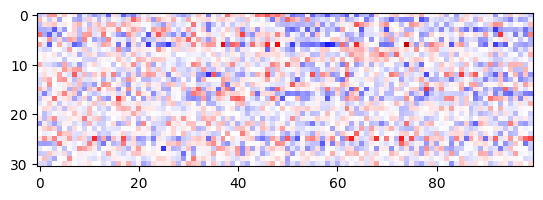

In [28]:
PSTH=DeltaFAll['11']['1.6']
print(PSTH.shape)
preStim=range(1,50)
SingL=100
baseLine=np.mean(np.mean(PSTH[:,preStim,:],axis=2),axis=1)
baseLine=np.tile(baseLine.T,(SingL,1)).T
print(baseLine.shape)
#Result=np.mean(PSTH[],axis=2)-baseLine
print(Result.shape)
plt.imshow(np.mean(PSTH,axis=2)-baseLine,cmap='seismic',vmin=-200,vmax=200)
#plt.plot(range(0,SingL),Result.T,'g')
#plt.plot(PSTH,'g')
#print(CellActivatedID)

In [27]:
PSTH=DeltaFAll['11']['1.6']
print(PSTH.shape)

(31, 100, 20)


In [37]:
Cell=statSingleP[3]
Cell

{'ypix': array([210, 211, 211, 211, 211, 211, 212, 212, 212, 212, 212, 212, 212,
        212, 212, 212, 213, 213, 213, 213, 213, 213, 213, 213, 213, 214,
        214, 214, 214, 214, 214, 214, 214, 214, 215, 215, 215, 215, 215,
        215, 215, 215, 215, 215, 215, 215, 215, 215, 216, 216, 216, 216,
        216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216,
        216, 217, 217, 217, 217, 217, 217, 217, 217, 217, 217, 217, 217,
        217, 217, 217, 217, 218, 218, 218, 218, 218, 218, 218, 218, 218,
        218, 218, 218, 218, 218, 218, 218, 219, 219, 219, 219, 219, 219,
        219, 219, 219, 219, 219, 219, 219, 219, 220, 220, 220, 220, 220,
        220, 220, 220, 220, 220, 220, 220, 220, 220, 221, 221, 221, 221,
        221, 221, 221, 221, 221, 221, 221, 222, 222, 222, 222, 222, 222,
        223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 224, 224, 224,
        224, 224, 224, 225, 225, 225, 225, 225, 225, 225, 226, 226, 226]),
 'xpix': array([266, 257, 258, 260, 266, 

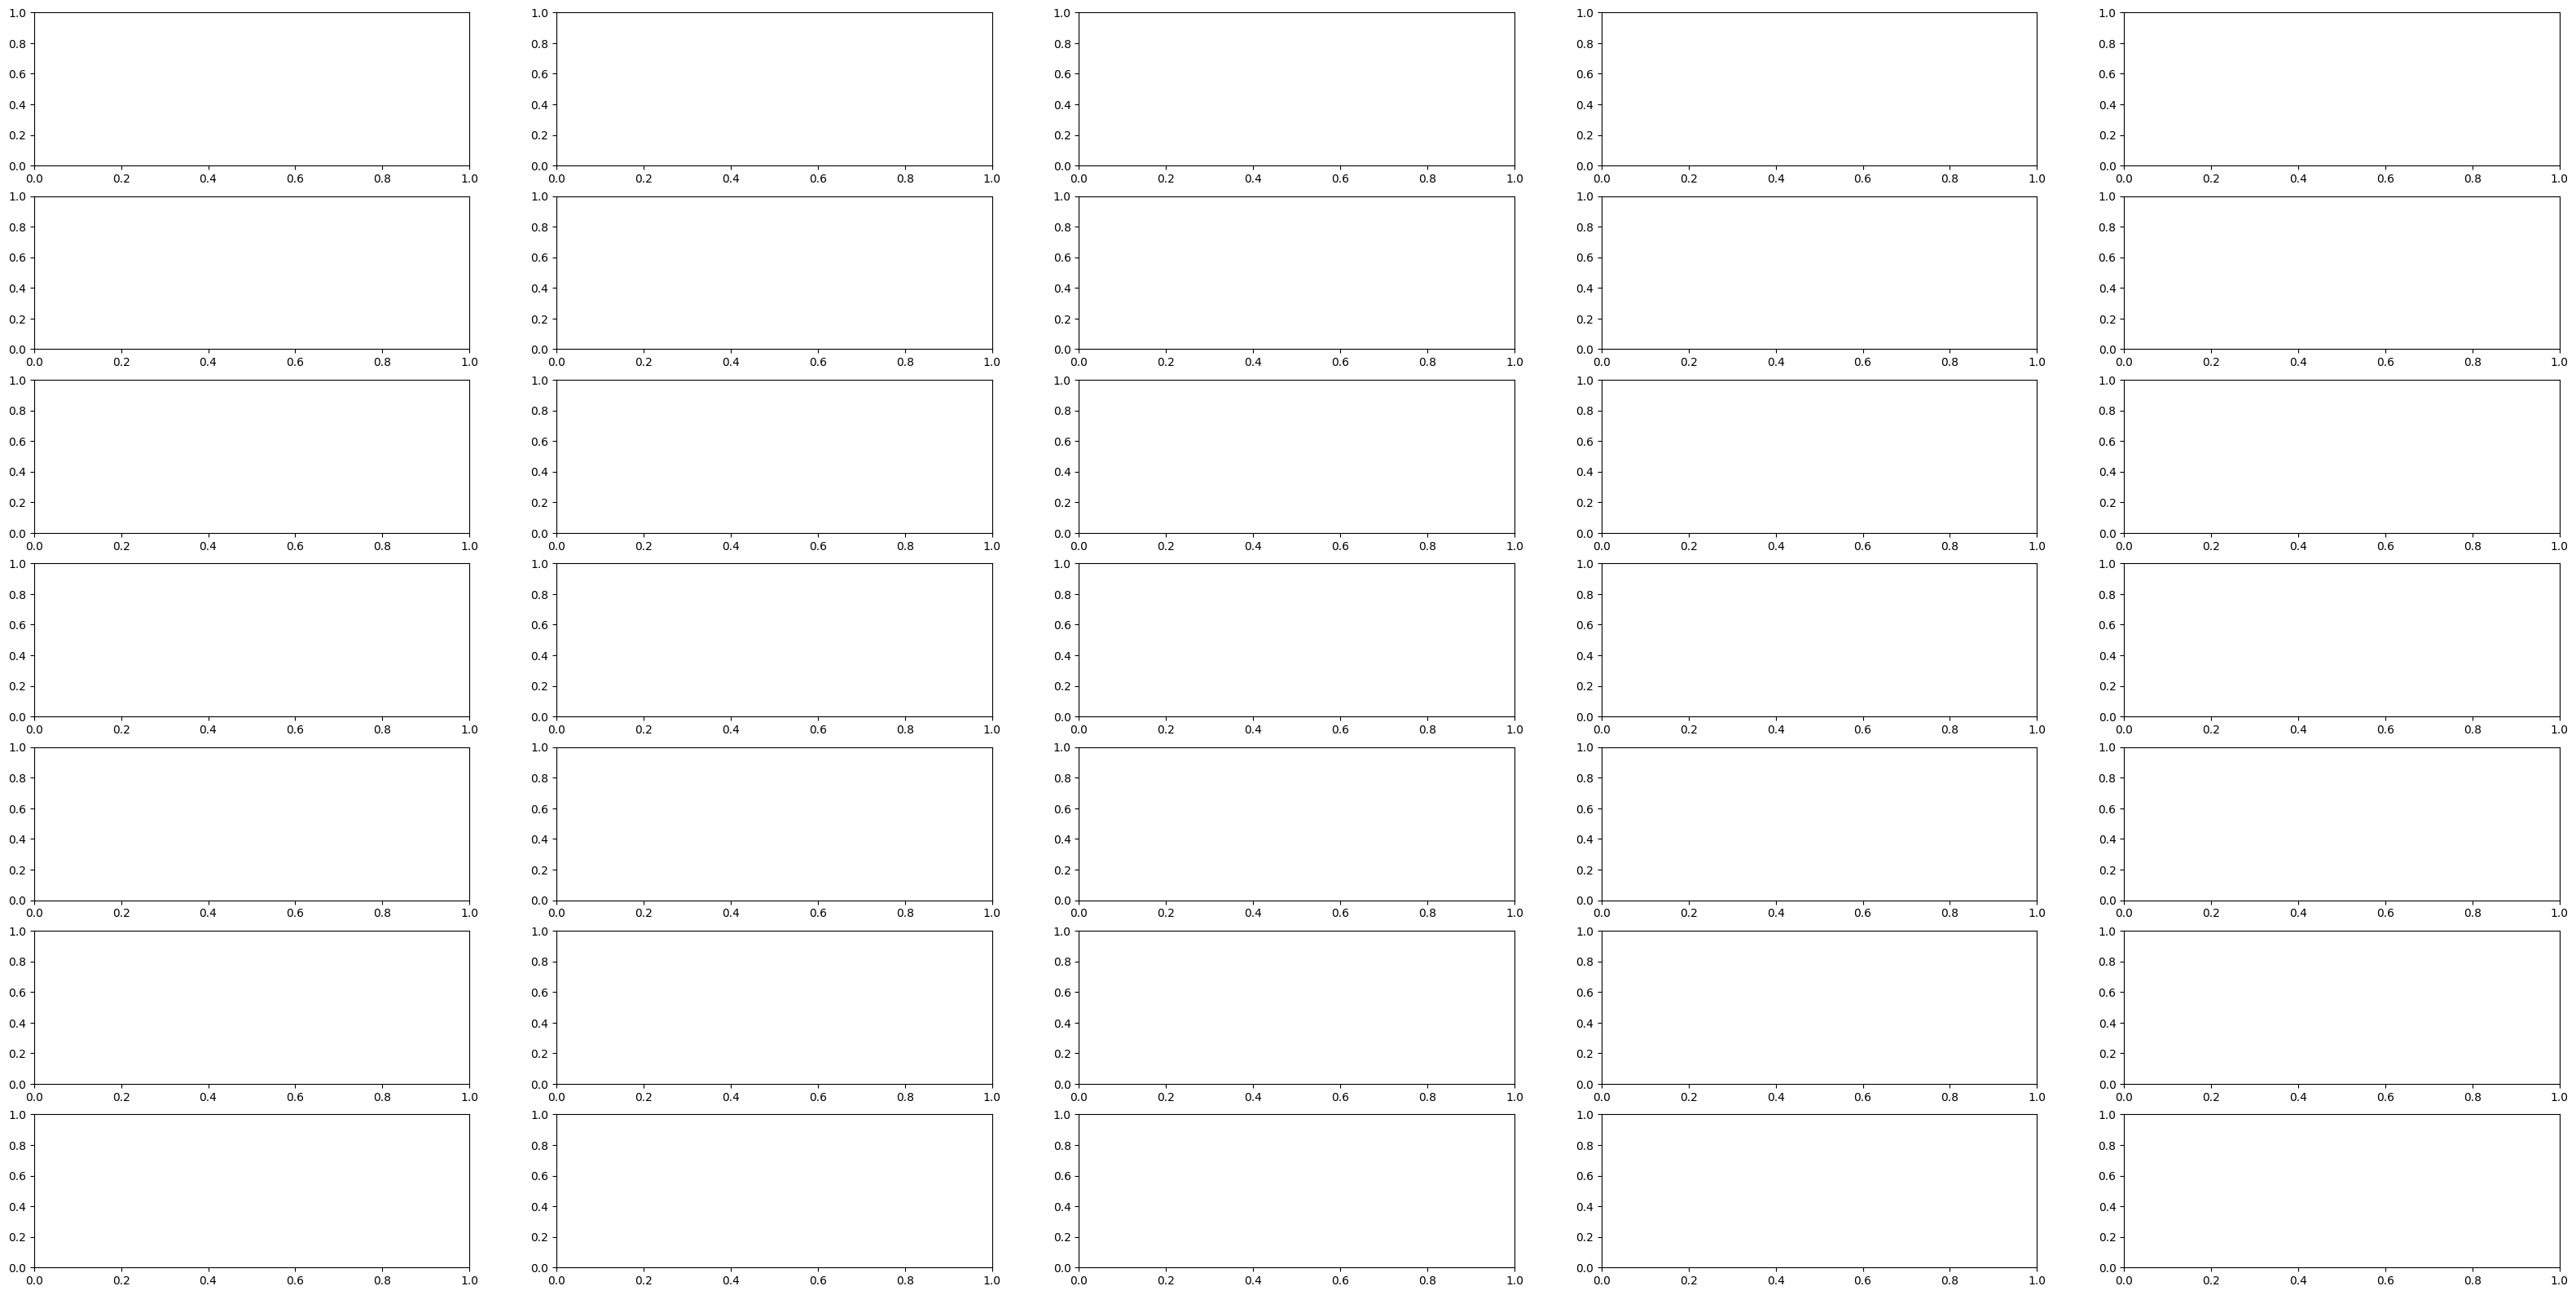

In [40]:
base_dir = ops0['save_path0']
#base_dir = r'F:\LuSLMOnlineTest\04222024\SingleP\30PixelFromEdgeExc\Data'
Radius=10
Laser_values = [1.6]
colorCell=[None]
colorCell[0]=[0,1,0]
BaselineInd=range(40,50)
ResponseInd=range(51,53)
LineWidth=2
ResponseAll=[None]*len(PlaneSingleP)
#print(np.ceil(len(statSingleP)/4)
num_rows = np.ceil(len(statSingleP) / 5).astype(int)
fig, ax = plt.subplots(num_rows,5,figsize=(40,20))
#ax=ax.flatten()


for CellI,axSub in enumerate(ax.flatten()):
    if CellI == len(statSingleP):
      break
    Cell=statSingleP[CellI]
    CellXYtemp=CellXYZ[SinglePInd[CellI],range(2)]
   # CellXYtemp=CellXYZ[SinglePInd[CellID],range(2)]
    Laser = Laser_values[0]
    statCell=[None]
    statCell[0]=statSingleP[CellI]
    Point=CellI+1
    Laser=Laser
    #SingL=25
    plane_idx=PlaneSingleP[CellI]
    #print(plane_idx)
    matching_files = []
    file_pattern = f'Laser{Laser}GPoint{Point}.bin'
    #print(file_pattern)
    matching_files.extend(glob.glob(os.path.join(base_dir, '*' + file_pattern)))
    if len(matching_files)==0:
       continue
    #print(matching_files)
    ResponseAll[CellI]=CB.BinList_PSTHHeatMap(matching_files,BaselineInd,ResponseInd,ops0)
    #print(CellI)
   # ax[CellI].imshow(ResponseMap[:,:,plane_idx],cmap='seismic',vmin=-1000,vmax=1000)
    im=axSub.imshow(ResponseAll[CellI][plane_idx,:,:],cmap='seismic',vmin=-1000,vmax=1000)
    CB.plotCellCenter(axSub, ops0['Ly'], CellXYtemp, Radius, colorCell, LineWidth)

In [ ]:

#PSTH=PSTHFromBin(matching_files,statCell,plane_idx,SingL,TrialNum)
#np.shape(PSTH)
#plt.plot(np.mean(PSTH,axis=1))
#fig, ax = plt.subplots(4,4)
#ax[0].plot(np.mean(PSTH,axis=1))
#BaselineInd=range(2,10)
#ResposeInd=range(13,26)
#print(matching_files)
fig, ax = plt.subplots()
ResponseMap=CB.BinList_PSTHHeatMap(matching_files,BaselineInd,ResponseInd,ops0)
#print(ResponseMap.shape)
print(plane_idx)
#ax[1].imshow(ResponseMap[:,:,plane_idx],cmap='seismic',vmin=-1000,vmax=1000)
ax.imshow(ResponseMap[plane_idx,:,:],cmap='seismic',vmin=-200,vmax=200)
print(SinglePInd)
print(SinglePInd[CellID])
CellXYtemp=CellXYZ[SinglePInd[CellID],range(2)]
Radius=5

colorCell=[None]
colorCell[0]=[0,1,0]
LineWidth=1
CB.plotCellCenter(ax, ops0['Ly'], CellXYtemp, Radius, colorCell, LineWidth)


In [ ]:

#PSTH=PSTHFromBin(matching_files,statCell,plane_idx,SingL,TrialNum)
#np.shape(PSTH)
#plt.plot(np.mean(PSTH,axis=1))
#fig, ax = plt.subplots(4,4)
#ax[0].plot(np.mean(PSTH,axis=1))
#BaselineInd=range(2,10)
#ResposeInd=range(13,26)
#print(matching_files)
fig, ax = plt.subplots()
ResponseMap=BinList_PSTHHeatMap(matching_files,BaselineInd,ResponseInd,ops0)
#print(ResponseMap.shape)
print(plane_idx)
#ax[1].imshow(ResponseMap[:,:,plane_idx],cmap='seismic',vmin=-1000,vmax=1000)
ax.imshow(ResponseMap[plane_idx,:,:],cmap='seismic',vmin=-300,vmax=300)
print(SinglePInd)
print(SinglePInd[CellID])
CellXYtemp=CellXYZ[SinglePInd[CellID],range(2)]
Radius=5

colorCell=[None]
colorCell[0]=[0,1,0]
LineWidth=1
plotCellCenter(ax, CellXYtemp, Radius, colorCell, LineWidth)


In [ ]:
print(PlaneSingleP)
print(len(statSingleP))
print(SinglePID)
print(Point)

In [ ]:
colorCell=[None]
colorCell[0]=[0,1,0]
LineWidth=1
fig, ax = plt.subplots(4,4,figsize=(40,20))
#ax=ax.flatten()
ResponseMap=[None]*len(PlaneSingleP)

for CellI,axSub in enumerate(ax.flatten()):
    Cell=statSingleP[CellI]
    Laser = Laser_values[1]
    statCell[0]=Cell
        #print(Cell)
    Point=CellI+1
    Laser=Laser
    SingL=25
    plane_idx=PlaneSingleP[CellI]
    print(plane_idx)
    matching_files = []
    file_pattern = f'Laser{Laser}Point{Point}.bin'
    #print(file_pattern)
    matching_files.extend(glob.glob(os.path.join(base_dir, '*' + file_pattern)))
    print(matching_files)
    ResponseMap[CellI]=BinList_PSTHHeatMap(matching_files,BaselineInd,ResponseInd,ops0)
    print(CellI)
   # ax[CellI].imshow(ResponseMap[:,:,plane_idx],cmap='seismic',vmin=-1000,vmax=1000)
    im=axSub.imshow(ResponseMap[CellI][plane_idx,:,:],cmap='seismic',vmin=-1000,vmax=1000)
    #print(SinglePInd)
    #print(SinglePInd[CellI])
    #CellXYtemp=CellXYZ[SinglePInd[CellI],range(2)]
    # Radius=5
   # plotCellCenter(ax[CellI], CellXYtemp, Radius, colorCell, LineWidth)
    #plotCellCenter(axSub, CellXYtemp, Radius, colorCell, LineWidth)


In [ ]:
print(matching_files)

In [ ]:
colorCell=[None]
colorCell[0]=[0,1,0]
LineWidth=2
fig, ax = plt.subplots(2,3,figsize=(80,40))
#ax=ax.flatten()
Radius=8
CellI=0
#for CellI,axSub in enumerate(ax.flatten()):
for axSub in ax.flatten():
    Cell=statSingleP[CellI]
    Laser = Laser_values[1]
    statCell[0]=Cell
        #print(Cell)
    Point=CellI+1
    Laser=Laser
    SingL=25
    plane_idx=PlaneSingleP[CellI]
    print(plane_idx)
    im=axSub.imshow(ResponseMap[CellI][plane_idx,:,:],cmap='seismic',vmin=-1000,vmax=1000)
    #print(im)
    #print(SinglePInd)
    #print(SinglePInd[CellI])
    CellXYtemp=CellXYZ[SinglePInd[CellI],range(2)]
    # Radius=5
   # plotCellCenter(ax[CellI], CellXYtemp, Radius, colorCell, LineWidth)
    CellXYtemp=CellXYtemp[::-1]
    #plotCellCenter(imT.axis, CellXYtemp, Radius, colorCell, LineWidth)
    circle = Circle(CellXYtemp, Radius, color=colorCell[0], linewidth=LineWidth, fill=False)
    axSub.add_patch(circle)
    CellI+=1
    #plt.show()
cbar = fig.colorbar(im, ax=ax.ravel().tolist())
plt.show()

In [ ]:
for CellI,Cell in enumerate(statSingleP):
    Laser = Laser_values[1]
    statCell[0]=Cell
        #print(Cell)
    Point=CellI+1
    Laser=Laser
    SingL=25
    plane_idx=PlaneSingleP[CellI]
#CellActivatedID=UnitNeedI[CellI]
#CellActivatedID=PointI_values[CellI]

    matching_files = []
    file_pattern = f'Laser{Laser}Point{Point}.bin'
    print(file_pattern)
    matching_files.extend(glob.glob(os.path.join(base_dir, '*' + file_pattern)))
    ResponseMap=BinList_PSTHHeatMap(matching_files,BaselineInd,ResposeInd,ops0)

    im=ax[CellI].imshow(ResponseMap[:,:,plane_idx],cmap='seismic',vmin=-1000,vmax=1000)
    print(SinglePInd)
    print(SinglePInd[CellID])
    CellXYtemp=CellXYZ[SinglePInd[CellID],range(2)]
    Radius=5
    plotCellCenter(ax[CellI], CellXYtemp, Radius, colorCell, LineWidth)

In [ ]:
fig, ax = plt.subplots()
for CellI,Cell in enumerate(statSingleP):
    for LaserI,Laser in enumerate(Laser_values):
        statCell[0]=Cell
        #print(Cell)
        Point=CellI+1
        Laser=Laser
        print(Laser)
        SingL=25
        plane_idx=PlaneSingleP[CellI]
#CellActivatedID=UnitNeedI[CellI]
#CellActivatedID=PointI_values[CellI]

        matching_files = []
        file_pattern = f'Laser{Laser}Point{Point}.bin'
        print(file_pattern)
#print(glob.glob(os.path.join(base_dir, '*' + file_pattern)))
        matching_files.extend(glob.glob(os.path.join(base_dir, '*' + file_pattern)))

       
ResponseMap=BinList_PSTHHeatMap(matching_files,BaselineInd,ResposeInd,ops0)
#ax[1].imshow(ResponseMap[:,:,plane_idx],cmap='seismic',vmin=-1000,vmax=1000)
ax.imshow(ResponseMap[:,:,plane_idx],cmap='seismic',vmin=-1000,vmax=1000)
print(SinglePInd)
print(SinglePInd[CellID])
CellXYtemp=CellXYZ[SinglePInd[CellID],range(2)]
Radius=5

colorCell=[None]
colorCell[0]=[0,1,0]
LineWidth=1
plotCellCenter(ax, CellXYtemp, Radius, colorCell, LineWidth)

In [ ]:
Radius=5
LineWidth=4
PlotXY=CellXYZ[SinglePInd[CellID],range(2)]
print(np.shape(PlotXY))
print(len(np.shape(PlotXY)))
colorCell = plt.cm.jet(range(len(cellCenterGroup)))

fig, ax = plt.subplots(1,3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plotCellCenter3D(ax,PlotXY, Radius, colorCell, LineWidth)

In [ ]:
def Suite2pCellIDMap(ops,stat,iscell):
    #"""
    #Get cellIDMap from Suite2p processed data.
    #"""


    cellValid = iscell[:, 0]
    stat=stat[iscell[:, 0]==1]
    #cellIDMap = np.zeros_like(ops['meanImg'])
    cellIDMap = np.zeros((ops['Ly'],ops['Lx']))
    MedCenter = []

    m, n = cellIDMap.shape

    validCellList = np.where(cellValid)[0]

    cellID=0
    for statCell in stat:
        cellID = cellID + 1
        roiPix = np.ravel_multi_index((statCell['ypix'], statCell['xpix']), cellIDMap.shape)
        cellIDMap.flat[roiPix] = cellID

        MedCenter.append([max(min(int(np.median(statCell['ypix'])), m), 1),
                          max(min(int(np.median(statCell['xpix'])), n), 1)])

    MedCenter = np.array(MedCenter)

    temp = np.setdiff1d(cellIDMap, 0)
    CellPixCount = np.histogram(temp, bins=np.arange(temp.min(), temp.max() + 2))[0]

    return cellIDMap, CellPixCount, MedCenter


def plotCellBoundary(cellIDMap, cellIDmark, *args):
    # Check the number of input arguments
    if len(args) < 1:
        colorCell = plt.cm.jet(range(len(cellIDmark)))
        LineWidth = 3
    elif len(args) == 1:
        colorCell = args[0]
        LineWidth = 3
    elif len(args) == 2:
        colorCell = args[0]
        LineWidth = args[1]
    else:
        # Handle other cases if needed
        pass

    # If colorCell is a single row, replicate it for each cellIDmark
    if colorCell.shape[0] == 1:
        colorCell = [colorCell] * len(cellIDmark)

    # Get cell boundaries using the CellIDMap2Boundary function
    cellBoundary = CellIDMap2Boundary(cellIDMap, cellIDmark)

    # Loop through each cell ID
    for i in range(len(cellIDmark)):
        # Loop through each boundary of the current cell ID
        for iB in range(len(cellBoundary[i])):
            # Plot the cell boundary using specified color and LineWidth
            plt.plot(cellBoundary[i][iB][:, 1], cellBoundary[i][iB][:, 0],
                     color=colorCell[i], linewidth=LineWidth)

    plt.show()  # Show the plot


def CellIDMap2Boundary(cellIDMap, cellCandidate=None):
    if cellCandidate is None:
        # Identify unique non-zero cell IDs
        cellCandidate = np.unique(cellIDMap)
        cellCandidate = cellCandidate[cellCandidate != 0]
        cellCandidate = np.sort(cellCandidate)

    cellBoundary = []

    # Loop through each cell candidate
    for icell in cellCandidate:
        # Create a temporary binary map for the current cell
        tempMap = np.zeros_like(cellIDMap)
        tempMap[cellIDMap == icell] = 1

        # Find the boundary of the cell using bwboundaries
        boundaries = measure.find_contours(tempMap, 0.5)

        cellBoundary.append(boundaries)

    return cellBoundary


def MultiMatrix3DPlotZ(ax,Data, ZPlot,vLim,Alpha):
    """
    Plot 3D matrices along the Z dimension.
    """
    X, Y = np.meshgrid(np.arange(Data.shape[1]), np.arange(Data.shape[0]))
    
    #fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')
    vmax=vLim[1]
    vmin=vLim[0]
    for k in range(Data.shape[2]):
        Z = np.ones_like(Data[:, :, k]) * ZPlot[k]  # Specify Z-values for each surface
        temp=Data[:, :, k]
        ax.plot_surface(X, Y, Z, facecolors=plt.cm.seismic((Data[:, :, k]-vmin)/(vmax-vmin)), alpha=Alpha,shade=False)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()
    return ax


def BinList_PSTHHeatMap(MultiBinFileList,BaselineInd,ResponseInd,ops0):

   # print(BaselineInd)
   # print(ResponseInd)
    nplanes=ops0['nplanes']
    #print(nplanes)
    baseMap=np.zeros((ops0['Ly'],ops0['Lx'],nplanes,len(MultiBinFileList)))
    ResponseMap=np.zeros((ops0['Ly'],ops0['Lx'],nplanes,len(MultiBinFileList)))
    for TrialI,Trial in enumerate(MultiBinFileList):
        rawBin = suite2p.io.BinaryFile(Ly=ops0['Ly'],Lx=ops0['Lx'], filename=Trial)
        FramePerPlane=np.floor(rawBin.shape[0]/ops0['nplanes'])
        TotalFrameNeed=np.int32(np.floor(FramePerPlane)*nplanes)
    #print(rawBin.shape)
        nplanes=ops0['nplanes']
    
        for plane_id in range(0,nplanes):
           # print(plane_idx)
                #print(range(0+plane_idx,TotalFrameNeed,nplanes))
            plane_data = rawBin[range(0+plane_id,TotalFrameNeed,nplanes),:,::-1]
        #print(plane_data.shape)
            plane_data=np.array(plane_data)
            DimEnd=len(baseMap.shape)
            baseMap[:,:,plane_id,TrialI]=np.mean(plane_data[BaselineInd,:,:],axis=0)
            ResponseMap[:,:,plane_id,TrialI]=np.mean(plane_data[ResponseInd,:,:],axis=0)

    DimEnd=len(baseMap.shape)
    baseMap=np.mean(baseMap,axis=DimEnd-1)
    ResponseMap=np.mean(ResponseMap,axis=DimEnd-1)-baseMap
    #ResponseMap=ResponseMap-baseMap
    return ResponseMap

In [ ]:
# Iterate over X and Y values and search for matching files
#PointFile=[None]*len(PointI_values)

for Ind,Trial in enumerate(matching_files):
    rawBin = suite2p.io.BinaryFile(Ly=ops0['Ly'],Lx=ops0['Lx'], filename=Trial)
    print(rawBin.shape)
    print(Trial)
    plane_data = rawBin[range(0+plane_idx,SingL*nplanes,nplanes),:,::-1]
    
    stat_after_extraction, F, Fneu, F_chan2, Fneu_chan2 = suite2p.extraction_wrapper(statCell, f_reg=plane_data,
                                                          f_reg_chan2 = plane_data,ops=ops0)
    dF = F.copy() - ops1['neucoeff']*Fneu

    dF = suite2p.extraction.preprocess(
    F=dF,
    baseline=ops1['baseline'],
    win_baseline=ops1['win_baseline'],
    sig_baseline=ops1['sig_baseline'],
    fs=ops1['fs'],
    prctile_baseline=ops1['prctile_baseline']
    )
    PSTH[:,Ind]=np.double(F)

preStim=range(0,10)
print(PSTH.shape)
baseLine=np.mean(np.mean(PSTH[preStim,:],axis=1),axis=0)
Response=np.mean(PSTH,axis=1)
print(Response.shape)
#baseLine=np.tile(baseLine.T,(SingL,1)).T
print(baseLine.shape)
#plt.imshow(np.mean(PSTH,axis=1)-baseLine,cmap='seismic')
np.shape(Response-baseLine)


#fig, ax = plt.subplots(1,3)
#ax[0].imshow(baseMap[:,:,0],cmap='seismic')

In [ ]:
fig, ax = plt.subplots()
ax.imshow(baseMap[:,:,0],cmap='seismic')

In [ ]:
def plotCellCenter3DGroup(cellCenterGroup, Radius, *args):
    if len(args) < 1:
        colorCell = plt.cm.jet(range(len(cellCenterGroup)))
        LineWidth = 1
    elif len(args) == 1:
        colorCell = args[0]
        LineWidth = 1
    elif len(args) == 2:
        colorCell = args[0]
        LineWidth = args[1]
    else:
        # Handle other cases if needed
        pass

    if len(colorCell) == 1:
        colorCell = np.tile(colorCell, (len(cellCenterGroup), 1))

    #print(Radius.shape)
    if Radius.shape[0] == 1:
        Radius = np.tile(Radius, len(cellCenterGroup))
        
    #print(Radius.shape)
    #fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')

    for iGroup in range(len(cellCenterGroup)):
        if cellCenterGroup[iGroup] is not None:
            plotCellCenter3D(cellCenterGroup[iGroup], Radius[iGroup], colorCell[iGroup], LineWidth)

    plt.show()
    return ax

def plotCellCenter3D(ax,cellCenter, Radius, colorCell, LineWidth):
    if len(colorCell) == 1:
        colorCell = np.tile(colorCell, (cellCenter.shape[0], 1))

    if np.shape(Radius) == 1:
        Radius = np.tile(Radius, cellCenter.shape[0])
    
    #print(Radius.shape)
    plt.show()
    if len(cellCenter.shape)==1:
       cellN=1
       CoorDim=len(cellCenter)
    else:
       CoorDim=cellCenter.shape[1]
    
    if CoorDim == 2:
        cellCenter = np.hstack((cellCenter, np.zeros((len(cellCenter), 1))))

    for i in range(cellN):
        theta = np.linspace(0, 2*np.pi, 50)
        x = cellCenter[i, 1] + Radius[i] * np.cos(theta)
        y = cellCenter[i, 0] + Radius[i] * np.sin(theta)
        z = np.zeros_like(x) + cellCenter[i, 2]
        ax.plot(x, y, z, color=colorCell[i], linewidth=LineWidth, linestyle='-')
        plt.show()
    
   # ax.set_xlabel('X-axis')
   # ax.set_ylabel('Y-axis')
    ##ax.set_zlabel('Z-axis')
   # ax.set_title('Cell Centers with Circles (3D)')


In [ ]:
BaselineInd=range(2,10)

ResposeInd=range(12,25)
matching_files = []
#file_pattern = f'Laser{Laser}Point{2}.bin'
file_pattern = f'Point{2}.bin'
#print(file_pattern)
#print(glob.glob(os.path.join(base_dir, '*' + file_pattern)))
matching_files.extend(glob.glob(os.path.join(base_dir, '*' + file_pattern)))

#print(matching_files)
ResponseMap=BinList_PSTHHeatMap(matching_files,BaselineInd,ResposeInd,ops0)


#fig, ax = plt.subplots(1,3)
#ax[0].imshow(baseMap[:,:,0],cmap='seismic')
#ax[1].imshow(ResponseMap[:,:,1],cmap='seismic')
#ax[2].imshow(ResponseMap[:,:,2],cmap='seismic')

# Example usage
ZPlot = [0,50,100]
vLim=[-1000,1000]
# Assuming you have defined ResponseMap elsewhere
#fig, ax = plt.subplots()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
MultiMatrix3DPlotZ(ax,ResponseMap, ZPlot,vLim,0.1)
plt.show()
cellCenterGroup=[None]*1
cellCenterGroup[0]=CellXYZ[[1,3,5,11,9,15,19],:]
Radius=[12]
Radius=np.array(Radius)
#len(Radius)

colorCell = plt.cm.jet(np.linspace(0, 1, 8))

LineWidth=20
plotCellCenter3D(ax,cellCenterGroup[0], Radius, colorCell, LineWidth)
#plotCellCenter3DGroup(ax,cellCenterGroup, Radius)
#plt.imshow(ResponseMap[:,:,1],cmap='viridis')
#plt.cm.viridis(Data[:, :, k])

In [ ]:
Radius = [12]
Radius = np.array(Radius)

colorCell = plt.cm.jet(5)

LineWidth = 3

# Assuming cellCenterGroup is defined elsewhere


plotCellCenter3D(ax, CellXYZ[[1,3,5],:], Radius, colorCell, LineWidth)

plt.show()  # Call plt.show() after all plotting is done

In [ ]:
def BinList_PSTHHeatMap(MultiBinFileList,BaselineInd,ResponseInd,ops0):

   # print(BaselineInd)
   # print(ResponseInd)
    nplanes=ops0['nplanes']
    #print(nplanes)
    baseMap=np.zeros(len(MultiBinFileList)),nplanes,(ops0['Ly'],ops0['Lx'])
    ResponseMap=np.zeros(len(MultiBinFileList)),nplanes,(ops0['Ly'],ops0['Lx'])
    for TrialI,Trial in enumerate(MultiBinFileList):
        rawBin = suite2p.io.BinaryFile(Ly=ops0['Ly'],Lx=ops0['Lx'], filename=Trial)
        FramePerPlane=np.floor(rawBin.shape[0]/ops0['nplanes'])
        TotalFrameNeed=np.int32(np.floor(FramePerPlane)*nplanes)
    #print(rawBin.shape)
        nplanes=ops0['nplanes']
    
        for plane_id in range(0,nplanes):
           # print(plane_id)
                #print(range(0+plane_id,TotalFrameNeed,nplanes))
            plane_data = rawBin[range(0+plane_id,TotalFrameNeed,nplanes),:,::-1]
        #print(plane_data.shape)
            plane_data=np.array(plane_data)

            baseMap[TrialI,plane_id,:,:]=np.mean(plane_data[BaselineInd,:,:],axis=0)
            ResponseMap[TrialI,plane_id,:,:]=np.mean(plane_data[ResponseInd,:,:],axis=0)

    #DimEnd=len(baseMap.shape)
    baseMap=np.mean(baseMap,axis=0)
    ResponseMap=np.mean(ResponseMap,axis=0)-baseMap
    #ResponseMap=ResponseMap-baseMap
    return ResponseMap


In [ ]:
np.array(range(0,len(statSingleP),4))

In [ ]:
PointI_values

In [ ]:
# Iterate over X and Y values and search for matching files
#PointFile=[None]*len(PointI_values)
TrialNum=3
PostPSTH=np.zeros((len(PointI_values),len(Laser_values),len(statSingleP),TrialNum))
print(base_dir)

CellID=2
Point=PointI_values[CellID]
Laser=Laser_values[1]
print(Laser)
SingL=30
plane_idx=PlaneSingleP[CellID]
#CellActivatedID=UnitNeedI[CellID]
CellActivatedID=PointI_values[CellID]-1

matching_files = []
file_pattern = f'Laser{Laser}Point{Point}.bin'
print(file_pattern)
#print(glob.glob(os.path.join(base_dir, '*' + file_pattern)))
matching_files.extend(glob.glob(os.path.join(base_dir, '*' + file_pattern)))

print(matching_files)
ops1=ops0

PSTH=np.zeros((len(statSingleP),SingL,TrialNum))
for Ind,Trial in enumerate(matching_files):
    rawBin = suite2p.io.BinaryFile(Ly=ops0['Ly'],Lx=ops0['Lx'], filename=Trial)
    print(rawBin.shape)
    print(Trial)
    plane_data = rawBin[range(0+plane_idx,SingL*nplanes,nplanes),:,::-1]
    
    stat_after_extraction, F, Fneu, F_chan2, Fneu_chan2 = suite2p.extraction_wrapper(statSingleP, f_reg=plane_data,
                                                          f_reg_chan2 = plane_data,ops=ops0)
    dF = F.copy() - ops1['neucoeff']*Fneu

    dF = suite2p.extraction.preprocess(
    F=dF,
    baseline=ops1['baseline'],
    win_baseline=ops1['win_baseline'],
    sig_baseline=ops1['sig_baseline'],
    fs=ops1['fs'],
    prctile_baseline=ops1['prctile_baseline']
    )
    PSTH[:,:,Ind]=np.double(dF)

preStim=range(0,10)
baseLine=np.mean(np.mean(PSTH[:,preStim,:],axis=2),axis=1)
print(np.shape(baseLine.T))
baseLine=np.tile(baseLine.T,(SingL,1)).T
print(baseLine.shape)
plt.imshow(np.mean(PSTH,axis=2)-baseLine,cmap='seismic',vmin=-200,vmax=200)
plt.plot(0,CellActivatedID,'g*')
print(CellActivatedID)

In [ ]:
preStim=range(0,10)
baseLine=np.mean(np.mean(PSTH[:,preStim,:],axis=2),axis=1)
print(np.shape(baseLine.T))
baseLine=np.tile(baseLine.T,(SingL,1)).T
print(baseLine.shape)
plt.imshow(np.mean(PSTH,axis=2)-baseLine,cmap='seismic')
plt.plot(0,CellActivatedID,'r*')

In [ ]:
print(Ind)
#dF.shape
PSTH[:,:,Ind]=np.double(dF)
dF.shape
PSTH.shape

In [ ]:
PSTH[:,:,Ind]=np.double(dF)

In [ ]:
# Iterate over X and Y values and search for matching files
PointFile=[None]*len(PointI_values)
TrialNum=3
PostPSTH=np.zeros((len(PointI_values),len(Laser_values)),len(statSingleP),TrialNum)

for Idx,Point in enumerate(PointI_values):
    PointFile[Idx]=[None]*len(Laser_values)
    for jdx,Laser in enumerate(Laser_values):
        matching_files = []
        # Construct the filename pattern
    #filename = file_pattern.format(X, Y)
    #filename = file_pattern.format(Point)
        file_pattern = f'Laser{Laser}Point{Point}.bin'
    #print(filename)
        # Search for files matching the pattern in the directory
    #print(os.path.join(base_dir, '**', filename))
    #files = glob.glob(os.path.join(base_dir, '**', filename), recursive=True)
   # print(files)
        # Add matching files to the list
    #matching_files.extend(files)
        matching_files.extend(glob.glob(os.path.join(base_dir, '*' + file_pattern)))
        PointFile[Idx][jdx]=matching_files
        print(matching_files)


In [ ]:
PointFile[0][1]

In [ ]:
np.shape(PointFile)

In [ ]:
# Print the matching file paths
PreStimN=15
PostStimN=25

PreStim=range(0,15)
PostStim=range(PreStimN,PreStimN+PostStimN)
plane_idx=0


In [ ]:
ops1=ops0
plane_idx=0
for Point in PointFile:
    for Laser in Point:
        for Trial in Laser:
            rawBin = suite2p.io.BinaryFile(Ly=ops0['Ly'],Lx=ops0['Lx'], filename=Trial)
            print(rawBin.shape)
            print(Trial)
            plane_data = rawBin[range(0+plane_idx,rawBin.shape[0],nplanes),:,:]
           # nFrame = rawBin.shape[0] // nplanes
        #print(nFrame)
        #statSingleP
            stat_after_extraction, F, Fneu, F_chan2, Fneu_chan2 = suite2p.extraction_wrapper(statSingleP, f_reg=plane_data,
                                                                   f_reg_chan2 = plane_data,ops=ops0)
            dF = F.copy() - ops1['neucoeff']*Fneu

            dF = suite2p.extraction.preprocess(
            F=dF,
            baseline=ops1['baseline'],
            win_baseline=ops1['win_baseline'],
            sig_baseline=ops1['sig_baseline'],
            fs=ops1['fs'],
            prctile_baseline=ops1['prctile_baseline']
           )

In [ ]:
#plt.imshow(dF)
np.shape(dF)
#plt.plot(dF.T)

In [ ]:
 plane_idx=0
 TotalFrameNeed=rawBin.shape[0]
 nplanes=3;
 plane_data = rawBin[range(0+plane_idx,TotalFrameNeed,nplanes),:,::-1]
   # plane_data = rawBin[range(0+plane_idx,TotalFrameNeed,nplanes),:,::-1]
    #ops, stat = suite2p.detection_wrapper(f_reg=plane_data, ops=ops1)
  #  ops['nframes']=nFrame
    #ops['meanImg']=np.mean(plane_data,axis=0)
   #meanImg=np.mean(plane_data,axis=0)
print(plane_data.shape)
plt.imshow(np.mean(plane_data,axis=0),vmin=0,vmax=500)
plt.colorbar()
#np.shape(data)
#data=np.read(rawBin)
#plt.imshow(np.mean(data,3))
#plt.imshow(np.mean(np.double(rawBin)), cmap='viridis')

In [ ]:
for file_path in PointFile:
    for Trial in file_path:
        rawBin = suite2p.io.BinaryFile(Ly=ops0['Ly'],Lx=ops0['Lx'], filename=Trial)
        print(rawBin.shape)
        plane_data = rawBin[range(0+plane_idx,rawBin.shape[0],nplanes),:,:]
        nFrame = rawBin.shape[0] // nplanes
        #print(nFrame)
        #statSingleP
        stat_after_extraction, F, Fneu, F_chan2, Fneu_chan2 = suite2p.extraction_wrapper(statSingleP, f_reg=plane_data,
                                                                   f_reg_chan2 = plane_data,ops=ops0)

In [ ]:
F